In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

In [5]:
df = pd.read_csv('wine.csv', sep=',')
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
922,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
923,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1
924,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
925,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1


In [6]:
df.isnull().values.any()

False

<AxesSubplot:>

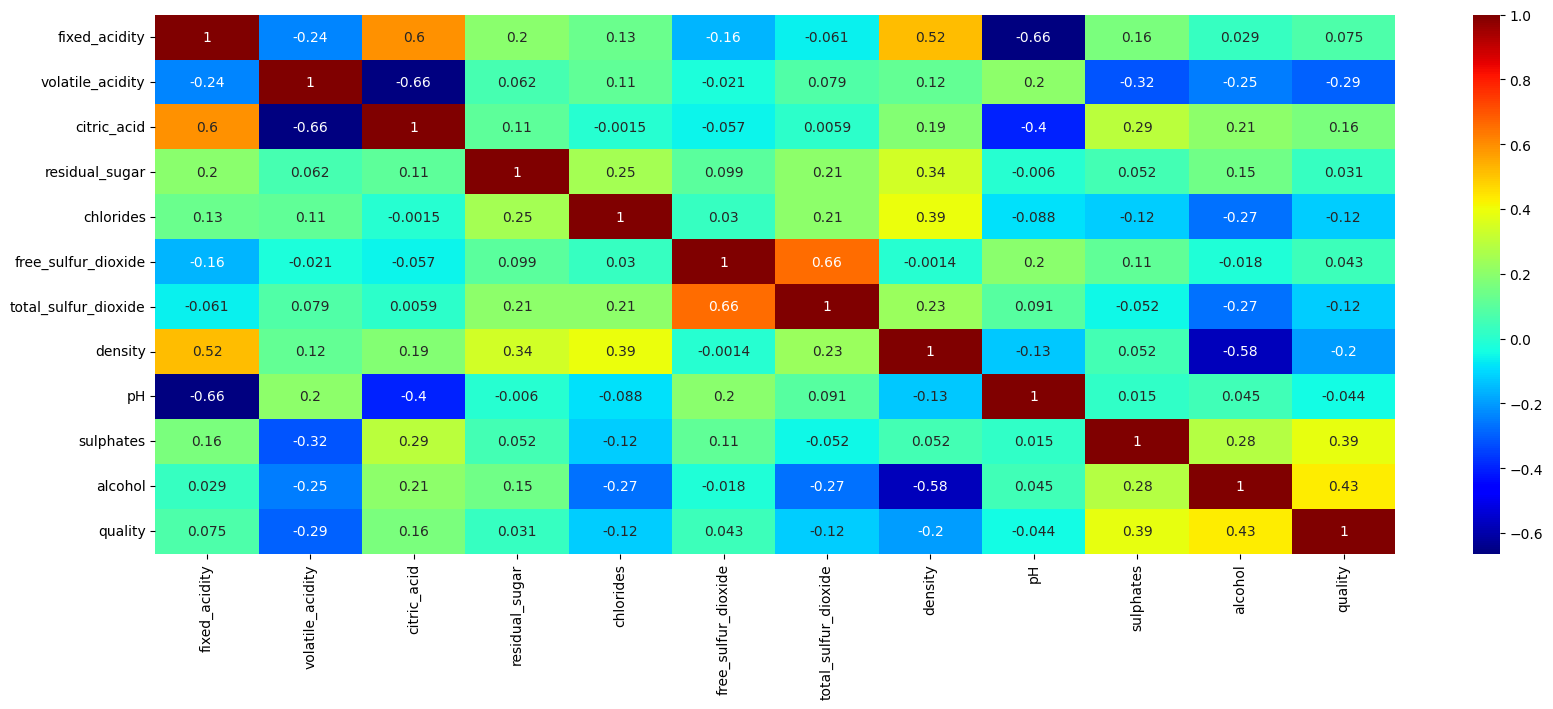

In [7]:
plt.figure(figsize=(20,7))
cor = df.corr()
sns.heatmap(cor, annot = True, cmap='jet')

In [8]:
Y = df['quality']
X = df[['fixed_acidity', 'volatile_acidity', 'residual_sugar', 'sulphates', 'pH', 'alcohol']]

#Y = df['species']
#X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
print(X_train.shape) 
print(X_test.shape)
Y_test = np.array(Y_test)

(695, 6)
(232, 6)


## Decision Tree

In [10]:
clf1 = tree.DecisionTreeClassifier()
clf1.fit(X_train, Y_train)

predicted = clf1.predict(X_test)

c = []
for j in range(len(Y_test)):
    b = Y_test[j] - predicted[j]
    if b != 0:
        c.append(b)
err_y = len(c)/len(Y_test)
print('abs err:', err_y)

abs err: 0.27155172413793105


In [11]:
print('accuracy: ', accuracy_score(Y_test, predicted))

accuracy:  0.728448275862069


In [12]:
df0 = pd.DataFrame({'Actual': Y_test, 'Predicted': predicted})

In [13]:
df0

,Actual,Predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1
...,...,...
227,1,1
228,1,1
229,0,0
230,1,1


In [14]:
confusion_matrix(Y_test, predicted)

array([[74, 27],
       [36, 95]], dtype=int64)

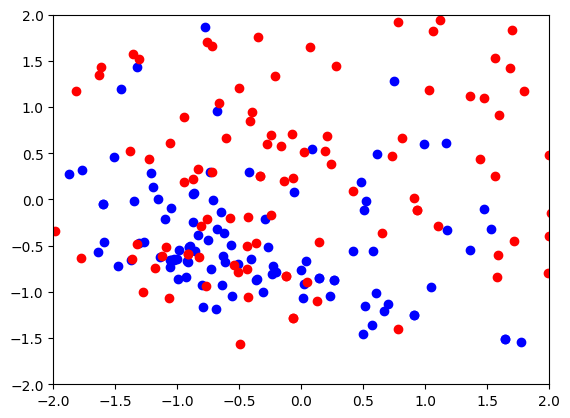

In [15]:
pca = PCA(n_components=2)
x_test_new = pca.fit_transform(X_test)

plt.plot(x_test_new[predicted == 0,0], x_test_new[predicted == 0,1], 'bo')
plt.plot(x_test_new[predicted == 1,0], x_test_new[predicted == 1,1], 'ro')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show() 

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


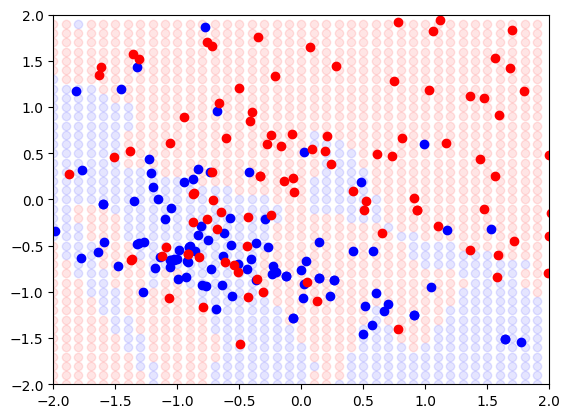

In [25]:
x_background = []

i = -2
while i <= 2:
  j = -2
  while j <= 2:
    x_background.append([i,j])
    j = j + 0.1
  i = i + 0.1
x_back = np.array(x_background)

x_background_transform = pca.inverse_transform(x_back)
y_background = clf1.predict(x_background_transform)

plt.plot(x_back[y_background == 0,0], x_back[y_background == 0,1], 'bo', alpha = 0.1)
plt.plot(x_back[y_background == 1,0], x_back[y_background == 1,1], 'ro', alpha =0.1)

plt.plot(x_test_new[predicted == 0,0], x_test_new[predicted == 0,1], 'bo')
plt.plot(x_test_new[predicted == 1,0], x_test_new[predicted == 1,1], 'ro')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

## Random Forest


In [17]:
clf2 = RandomForestClassifier(n_estimators = 40, max_depth=25)
clf2 = clf2.fit(X_train, Y_train)
predicted = clf2.predict(X_test)

c = []
for j in range(len(Y_test)):
    b = Y_test[j] - predicted[j]
    if b != 0:
        c.append(b)
err_y = len(c)/len(Y_test)
print('abs err:', err_y)

abs err: 0.2543103448275862


In [18]:
print('accuracy: ', accuracy_score(Y_test, predicted))

accuracy:  0.7456896551724138


In [19]:
df0 = pd.DataFrame({'Aсtual': Y_test, 'Predicted': predicted})

In [20]:
df0

,Aсtual,Predicted
0,1,1
1,1,1
2,0,1
3,1,1
4,1,1
...,...,...
227,1,0
228,1,1
229,0,0
230,1,1


In [23]:
confusion_matrix(Y_test, predicted)

array([[75, 26],
       [33, 98]], dtype=int64)

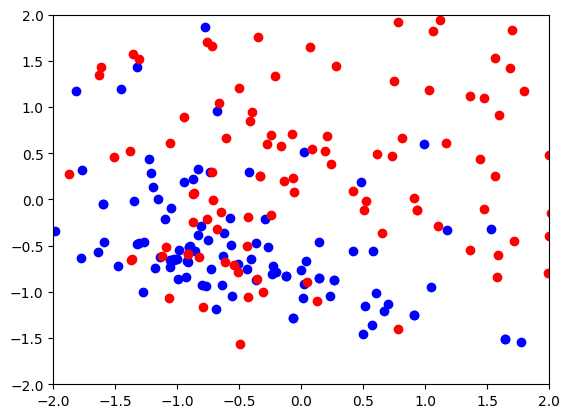

In [21]:
pca = PCA(n_components=2)
x_test_new = pca.fit_transform(X_test)

plt.plot(x_test_new[predicted == 0,0], x_test_new[predicted == 0,1], 'bo')
plt.plot(x_test_new[predicted == 1,0], x_test_new[predicted == 1,1], 'ro')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show() 

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


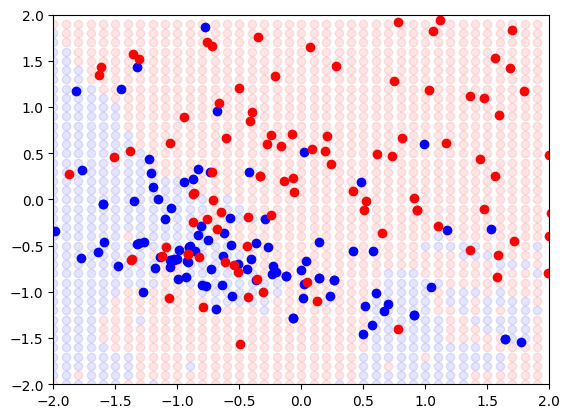

In [22]:
x_background = []

i = -2
while i <= 2:
  j = -2
  while j <= 2:
    x_background.append([i,j])
    j = j + 0.1
  i = i + 0.1
x_back = np.array(x_background)

x_background_transform = pca.inverse_transform(x_back)
y_background = clf2.predict(x_background_transform)

plt.plot(x_back[y_background == 0,0], x_back[y_background == 0,1], 'bo', alpha = 0.1)
plt.plot(x_back[y_background == 1,0], x_back[y_background == 1,1], 'ro', alpha =0.1)

plt.plot(x_test_new[predicted == 0,0], x_test_new[predicted == 0,1], 'bo')
plt.plot(x_test_new[predicted == 1,0], x_test_new[predicted == 1,1], 'ro')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()